In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
import numpy as np
import random
import copy
from networkx.drawing.nx_agraph import graphviz_layout

nx.graphviz_layout = graphviz_layout
random.seed(10)

### Read the adjacency list representation from .json data to a python list

In [2]:
with open(
    "../Jan_Karpiuk.json",
) as data_file:
    data = data_file.read()

adj_list = json.loads(data)
adj_dict = {idx: adj_list[idx] for idx in range(len(adj_list))}

### Create graph from dict of lists

In [3]:

G = nx.from_dict_of_lists(adj_dict)

# Exercise 1
### Draw the graph

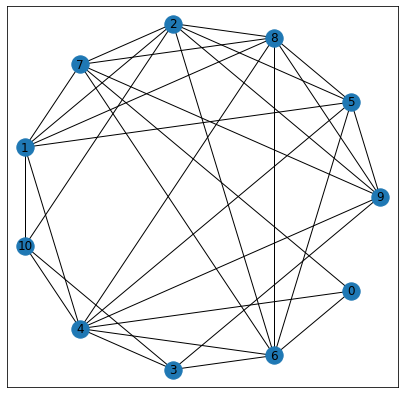

In [4]:

plt.figure(figsize=(7, 7))
ax = plt.axes()
ax.set_facecolor("white")
nx.draw_networkx(G, pos=nx.graphviz_layout(G, prog="circo"))
plt.draw()
plt.savefig("graph_notebook.png")
plt.show()
plt.close()

# Exercise 2
### Show graph incidence matrix

In [5]:
incidence_matrix = nx.incidence_matrix(G).todense()

import pandas as pd
from pandas import *

pd.set_option('precision', 0)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
DataFrame(incidence_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0
7,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
8,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1


# Exercise 3
### Check if graph is hamiltonian

In [6]:
def hamilton(G):
    F = [(G,[list(G.nodes())[0]])]
    n = G.number_of_nodes()
    while F:
        graph,path = F.pop()
        confs = []
        neighbors = (node for node in graph.neighbors(path[-1]) 
                     if node != path[-1]) #exclude self loops
        for neighbor in neighbors:
            conf_p = path[:]
            conf_p.append(neighbor)
            conf_g = nx.Graph(graph)
            conf_g.remove_node(path[-1])
            confs.append((conf_g,conf_p))
        for g,p in confs:
            if len(p)==n:
                return p
            else:
                F.append((g,p))
    return None

In [7]:
hamilton(G)

[0, 6, 7, 8, 9, 5, 4, 3, 10, 2, 1]

In [8]:
adjacency_matrix = nx.adjacency_matrix(G).todense()
adjacency_matrix = np.array(adjacency_matrix)
for line in adjacency_matrix:
    print (', '.join(map(str, line)) + ",")

0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,


## Conclusion:
### Graph is hamiltonian
### Hamiltonian cycle: 0⇒4⇒1⇒2⇒10⇒3⇒6⇒5⇒8⇒9⇒7⇒0

# Exercise 4
## Check if graph is eulerian

In [9]:
if nx.is_eulerian(G):
    conclusion = "The graph is eulerian"
else:
    conclusion = "The graph is not eulerian"

print("Conclusion: " + conclusion)

Conclusion: The graph is not eulerian


In [10]:
if nx.is_semieulerian(G):
    conclusion = "The graph is semi-eulerian"
else:
    conclusion = "The graph is not semi-eulerian"

print("Conclusion: " + conclusion)



Conclusion: The graph is not semi-eulerian


# Exercise 5
## Colorize graph by vertecies and edges

In [11]:
node_colors = nx.coloring.greedy_color(G, strategy="largest_first")
node_colors

{4: 0, 2: 0, 6: 1, 8: 2, 1: 1, 5: 3, 7: 3, 9: 1, 3: 2, 10: 3, 0: 2}

In [12]:
# sort node to color dict by keys
node_colors = dict(sorted(node_colors.items()))

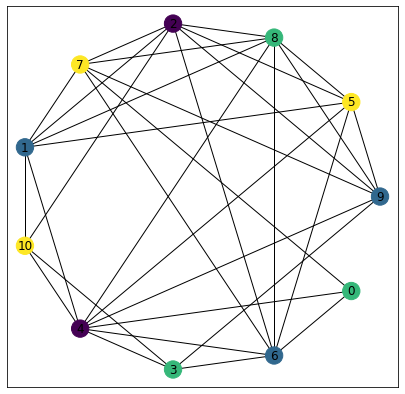

In [13]:
plt.figure(figsize=(7, 7))
ax = plt.axes()
ax.set_facecolor("white")
nx.draw_networkx(G, pos=nx.graphviz_layout(G, prog="circo"), node_color=list(node_colors.values()))
plt.draw()
plt.savefig("graph_notebook_exer_5.png")
plt.show()
plt.close()

# Exercise 6
## Get graph's chromatic number (vertecies) and chromatic index (edges) 

In [14]:
# get Graph chromatic number
chromatic_number = len(set(node_colors.values())) 

print("Graph chromatic number: " + str(chromatic_number))

Graph chromatic number: 4


# Exercise 7
## Get graph's minimum spanning tree 

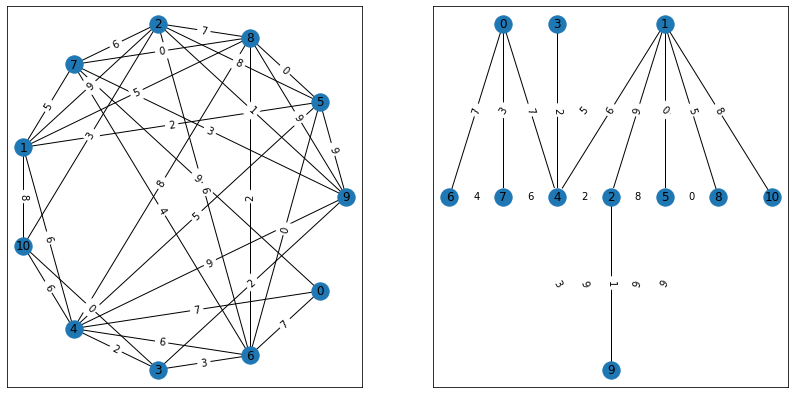

In [25]:
# create deep copy of the Graph
weighted_G = copy.deepcopy(G)
min_span_tree = nx.minimum_spanning_tree(weighted_G)

# assain random weights to edges
rnd_weights = {edge: random.randrange(0,10) for edge in weighted_G.edges()}
for edge in weighted_G.edges():
        weighted_G[edge[0]][edge[1]]['weight'] = rnd_weights[edge]


plt.figure(figsize=(14, 7))
ax.set_facecolor("white")

# draw the Graph with weights
plt.subplot(1, 2, 1)

pos_1=nx.graphviz_layout(weighted_G, prog="circo")
nx.draw_networkx(weighted_G, pos_1)
labels = nx.get_edge_attributes(weighted_G,'weight')
nx.draw_networkx_edge_labels(weighted_G,pos_1,edge_labels=labels)

# draw the minimum spanning tree with weights
plt.subplot(1, 2, 2)

pos_2=nx.graphviz_layout(min_span_tree, prog="dot")
nx.draw_networkx(min_span_tree, pos_2)
labels = nx.get_edge_attributes(weighted_G,'weight')
nx.draw_networkx_edge_labels(min_span_tree,pos_2,edge_labels=labels)

plt.draw()
plt.savefig("graph_notebook_exer_7.png")
plt.show()
plt.close()